In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load the data
data = pd.read_csv('agricultural_yield.csv')

In [3]:
# Separate features and target
X = data.drop(columns=['Yield_kg_per_hectare'])
y = data['Yield_kg_per_hectare']

In [4]:
# One-hot encode categorical columns if needed
X = pd.get_dummies(X, columns=['Soil_Quality', 'Seed_Variety', 'Irrigation_Schedule'], drop_first=True)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

C:\Users\MRUDUL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae}")

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 484004.4375 - mae: 665.8917 - val_loss: 435151.0938 - val_mae: 635.6964
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2114553.2500 - mae: 995.3257 - val_loss: 497367.6562 - val_mae: 679.6316
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 176437.4531 - mae: 339.8325 - val_loss: 501268.6875 - val_mae: 682.7995
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 147759.6250 - mae: 305.4388 - val_loss: 506921.9062 - val_mae: 686.9327
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 118952.8750 - mae: 270.8296 - val_loss: 509881.3125 - val_mae: 688.8698
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 92408.1016 - mae: 235.1676 - val_loss: 508943.9375 - val_mae: 687.9321
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 68283.7500 - mae: 199.3977 - val_loss: 506207.8438 - val_mae: 685.7808
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 51111.7422 - mae:

In [10]:
# Make predictions
predictions = model.predict(X_test)

# Save the model
model.save('yield_prediction_model.h5')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"The Mean Absolute Error: (test_mae:.2f)")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2588876.7500 - mae: 1604.5841
The Mean Absolute Error: (test_mae:.2f)


In [23]:
plt.plot(history.history['loss'], labels='Training Loss')
plt.plot(history.history['val_loss'], labels='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()


NameError: name 'plt' is not defined

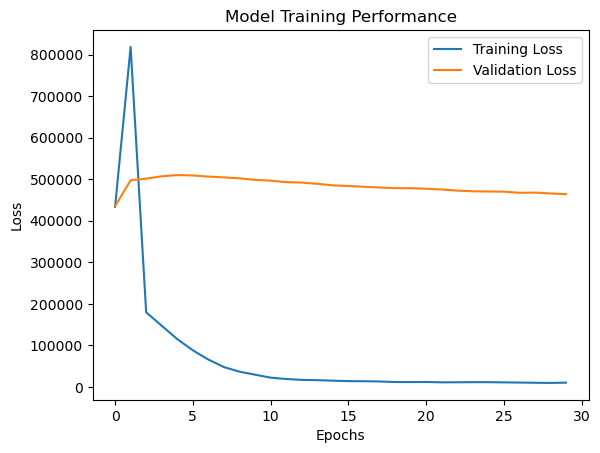

In [25]:

import matplotlib.pyplot as plt  # Importing pyplot module

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()


In [27]:


import matplotlib.pyplot as plt
import seaborn as sns


NameError: name 'y_pred' is not defined

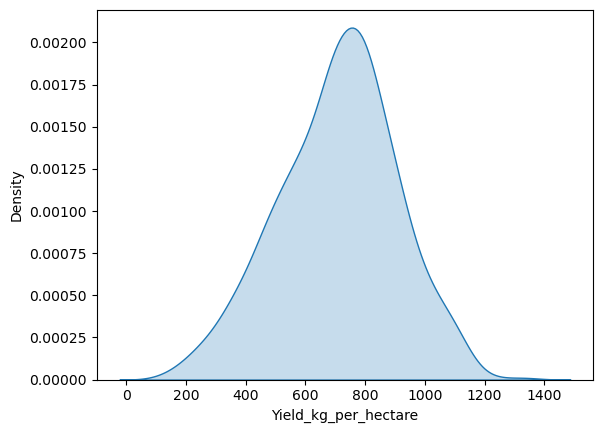

In [29]:
# Kernel Density Estimate (KDE) Plot for distributions
sns.kdeplot(y_test, label='Actual Yield', fill=True)
sns.kdeplot(y_pred, label='Predicted Yield', fill=True)
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()


NameError: name 'y_pred' is not defined

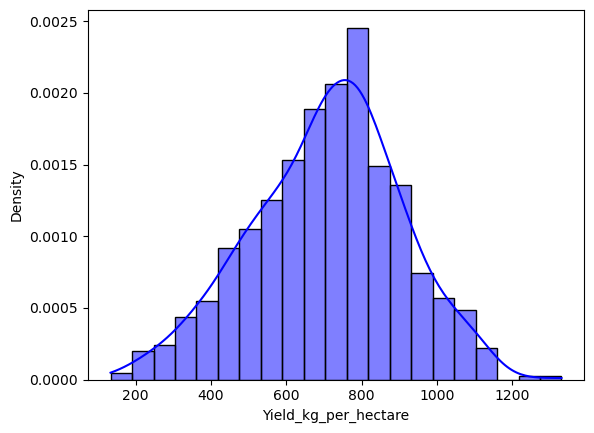

In [31]:
# Histogram for distributions
sns.histplot(y_test, label='Actual Yield', kde=True, color='blue', stat="density")
sns.histplot(y_pred, label='Predicted Yield', kde=True, color='orange', stat="density")
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()
